In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [110]:
loan_data=pd.read_csv('loanprediction.csv')

In [111]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [112]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [113]:
loan_data.shape

(614, 13)

In [114]:
loan_data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [115]:
loan_data['Credit_History'].fillna(loan_data['Credit_History'].median(),inplace=True)

In [116]:
loan_data['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [117]:
loan_data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [118]:
loan_data['Self_Employed'].fillna('No',inplace=True)

In [119]:
loan_data['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [120]:
loan_data.dropna(inplace=True)

In [121]:
loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [122]:
loan_data.shape

(553, 13)

In [123]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 553 entries, 1 to 613
Data columns (total 13 columns):
Loan_ID              553 non-null object
Gender               553 non-null object
Married              553 non-null object
Dependents           553 non-null object
Education            553 non-null object
Self_Employed        553 non-null object
ApplicantIncome      553 non-null int64
CoapplicantIncome    553 non-null float64
LoanAmount           553 non-null float64
Loan_Amount_Term     553 non-null float64
Credit_History       553 non-null float64
Property_Area        553 non-null object
Loan_Status          553 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 60.5+ KB


In [124]:
#loan id is not required so we will drop that feature

In [125]:
loan_data.drop(['Loan_ID'],axis=1,inplace=True)

In [126]:
gender=loan_data['Gender']
gender=pd.get_dummies(gender,drop_first=True)

In [127]:
gender.head()

,Male
1,1
2,1
3,1
4,1
5,1


In [128]:
loan_data['Dependents'].unique()

array(['1', '0', '2', '3+'], dtype=object)

In [129]:
dependent=loan_data['Dependents']
dependent=pd.get_dummies(dependent,drop_first=True)

In [130]:
dependent.head()

,1,2,3+
1,1,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,1,0


In [131]:
dependent.rename(columns={'1':'one','2':'two','3+':'three_plus'},inplace=True)

In [132]:
dependent.head()

,one,two,three_plus
1,1,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,1,0


In [133]:
loan_data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [134]:
education=loan_data['Education']
education=pd.get_dummies(education,drop_first=True)

In [135]:
education.head()

,Not Graduate
1,0
2,0
3,1
4,0
5,0


In [136]:
loan_data['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [137]:
selfemployed=loan_data['Self_Employed']
selfemployed=pd.get_dummies(selfemployed,drop_first=True)

In [138]:
selfemployed.head()

,Yes
1,0
2,1
3,0
4,0
5,1


In [139]:
selfemployed.rename(columns={'Yes':'yes_employed'},inplace=True)

In [140]:
selfemployed.head()

,yes_employed
1,0
2,1
3,0
4,0
5,1


In [141]:
marry=loan_data['Married']

In [142]:
marry.head()

1    Yes
2    Yes
3    Yes
4     No
5    Yes
Name: Married, dtype: object

In [143]:
marry=pd.get_dummies(marry,drop_first=True)

In [144]:
marry.head()

,Yes
1,1
2,1
3,1
4,0
5,1


In [145]:
marry.rename(columns={'Yes':'yes_marry'},inplace=True)

In [146]:
marry.head()

,yes_marry
1,1
2,1
3,1
4,0
5,1


In [147]:
loan_data['Property_Area'].unique()

array(['Rural', 'Urban', 'Semiurban'], dtype=object)

In [148]:
propertyarea=loan_data['Property_Area']
propertyarea=pd.get_dummies(propertyarea,drop_first=True)

In [149]:
propertyarea.head()

,Semiurban,Urban
1,0,0
2,0,1
3,0,1
4,0,1
5,0,1


In [150]:
loan_data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [151]:
loan_data.drop(['Gender','Married','Dependents','Education','Self_Employed','Property_Area'],axis=1,inplace=True)

In [152]:
loan_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
1,4583,1508.0,128.0,360.0,1.0,N
2,3000,0.0,66.0,360.0,1.0,Y
3,2583,2358.0,120.0,360.0,1.0,Y
4,6000,0.0,141.0,360.0,1.0,Y
5,5417,4196.0,267.0,360.0,1.0,Y


In [153]:




loan_data=pd.concat([loan_data,marry,dependent,education,selfemployed,propertyarea,gender],axis=1)

In [154]:
loan_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,yes_marry,one,two,three_plus,Not Graduate,yes_employed,Semiurban,Urban,Male
1,4583,1508.0,128.0,360.0,1.0,N,1,1,0,0,0,0,0,0,1
2,3000,0.0,66.0,360.0,1.0,Y,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,Y,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,Y,0,0,0,0,0,0,0,1,1
5,5417,4196.0,267.0,360.0,1.0,Y,1,0,1,0,0,1,0,1,1


In [155]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 553 entries, 1 to 613
Data columns (total 15 columns):
ApplicantIncome      553 non-null int64
CoapplicantIncome    553 non-null float64
LoanAmount           553 non-null float64
Loan_Amount_Term     553 non-null float64
Credit_History       553 non-null float64
Loan_Status          553 non-null object
yes_marry            553 non-null uint8
one                  553 non-null uint8
two                  553 non-null uint8
three_plus           553 non-null uint8
Not Graduate         553 non-null uint8
yes_employed         553 non-null uint8
Semiurban            553 non-null uint8
Urban                553 non-null uint8
Male                 553 non-null uint8
dtypes: float64(4), int64(1), object(1), uint8(9)
memory usage: 35.1+ KB


In [156]:
loan_data['Loan_Status']

1      N
2      Y
3      Y
4      Y
5      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 553, dtype: object

In [157]:
loanstatus=loan_data['Loan_Status']

In [158]:
loanstatus=pd.get_dummies(loanstatus,drop_first=True)

In [159]:
loanstatus.head()

,Y
1,0
2,1
3,1
4,1
5,1


In [160]:



loanstatus.rename(columns={'Y':'loanapproved'},inplace=True)

In [161]:
loanstatus.head()

,loanapproved
1,0
2,1
3,1
4,1
5,1


In [162]:

loan_data.drop(['Loan_Status'],axis=1,inplace=True)

In [163]:
loan_data=pd.concat([loan_data,loanstatus],axis=1)

In [164]:
loan_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,yes_marry,one,two,three_plus,Not Graduate,yes_employed,Semiurban,Urban,Male,loanapproved
1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0,0,1,0
2,3000,0.0,66.0,360.0,1.0,1,0,0,0,0,1,0,1,1,1
3,2583,2358.0,120.0,360.0,1.0,1,0,0,0,1,0,0,1,1,1
4,6000,0.0,141.0,360.0,1.0,0,0,0,0,0,0,0,1,1,1
5,5417,4196.0,267.0,360.0,1.0,1,0,1,0,0,1,0,1,1,1


In [165]:
loan_data.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
yes_marry            0
one                  0
two                  0
three_plus           0
Not Graduate         0
yes_employed         0
Semiurban            0
Urban                0
Male                 0
loanapproved         0
dtype: int64

In [166]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 553 entries, 1 to 613
Data columns (total 15 columns):
ApplicantIncome      553 non-null int64
CoapplicantIncome    553 non-null float64
LoanAmount           553 non-null float64
Loan_Amount_Term     553 non-null float64
Credit_History       553 non-null float64
yes_marry            553 non-null uint8
one                  553 non-null uint8
two                  553 non-null uint8
three_plus           553 non-null uint8
Not Graduate         553 non-null uint8
yes_employed         553 non-null uint8
Semiurban            553 non-null uint8
Urban                553 non-null uint8
Male                 553 non-null uint8
loanapproved         553 non-null uint8
dtypes: float64(4), int64(1), uint8(10)
memory usage: 31.3 KB


In [167]:
#all features are cleaned so now we will perform te feature selection

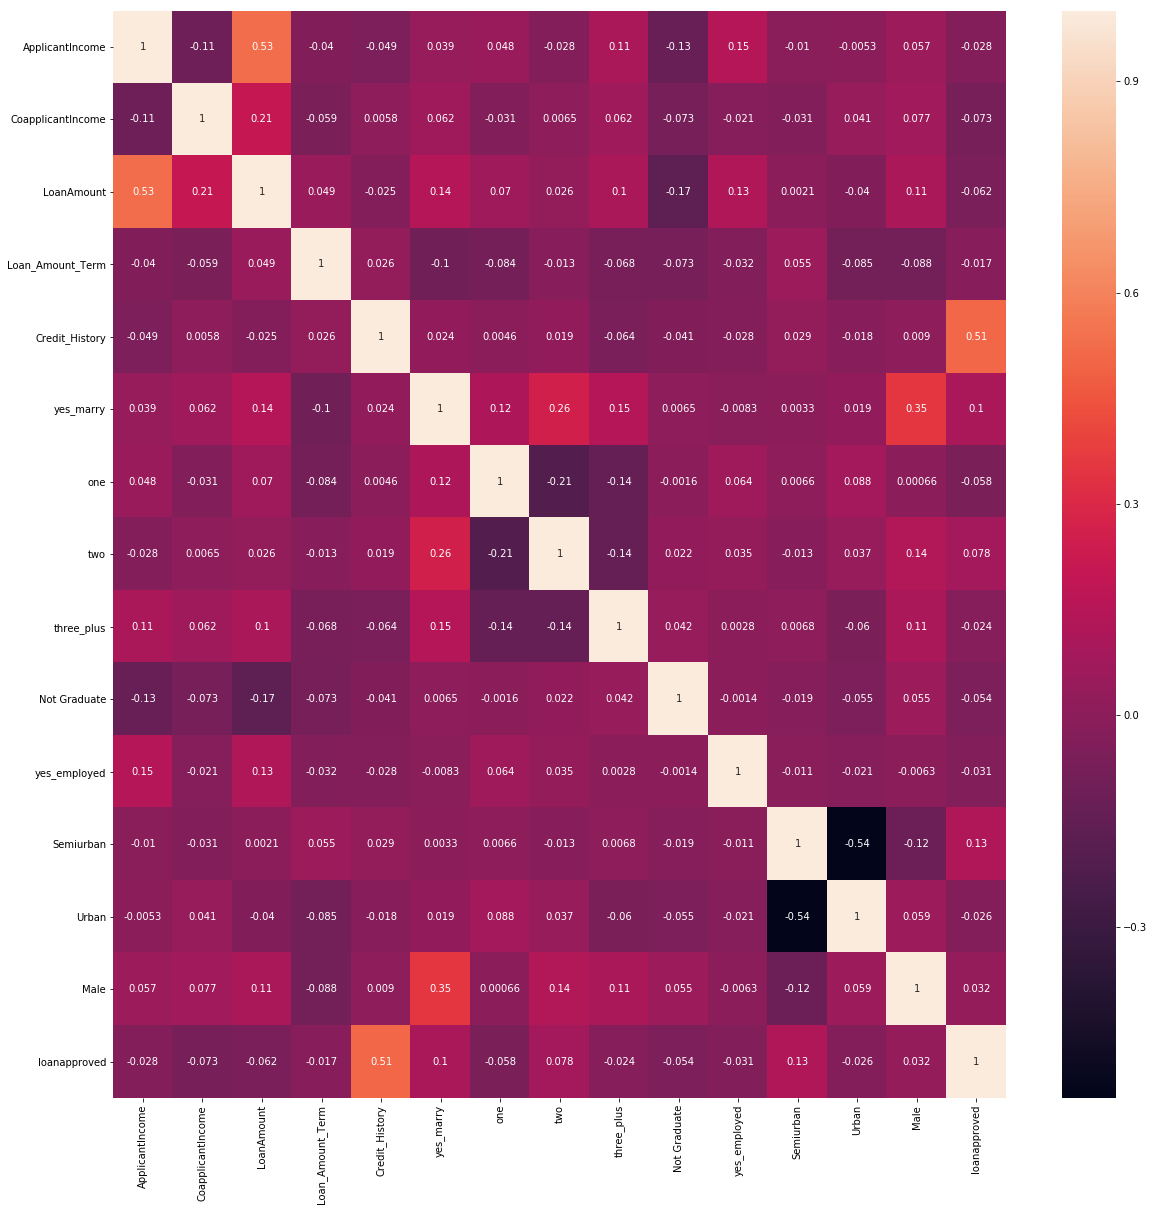

In [168]:
plt.figure(figsize=(20,20))
sns.heatmap(loan_data.corr(),annot=True)

In [169]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i  in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [170]:
correlation(loan_data,0.8)

set()

In [171]:
#no feature are highly correlatedd so will not drop NY OF THE FEATURE from here


In [172]:
loan_data.shape

(553, 15)

In [173]:
X=loan_data.iloc[:,:14]

In [174]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,yes_marry,one,two,three_plus,Not Graduate,yes_employed,Semiurban,Urban,Male
1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0,0,1
2,3000,0.0,66.0,360.0,1.0,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,0,0,0,0,0,0,0,1,1
5,5417,4196.0,267.0,360.0,1.0,1,0,1,0,0,1,0,1,1


In [175]:
Y=loan_data['loanapproved']

In [176]:
from sklearn.model_selection import train_test_split

In [177]:
#we will have to do feature scaling also because we are goung to ise the clssification

In [178]:
from sklearn.preprocessing import StandardScaler

In [179]:
stan=StandardScaler()

In [180]:
xstan=stan.fit_transform(X)

In [181]:
xtrain,xtest,ytrain,ytest=train_test_split(xstan,Y,train_size=0.7,random_state=0)

In [182]:
xtrain.shape

(387, 14)

In [184]:
xtrain.columns

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
forest_reg=RandomForestClassifier()

In [76]:
forest_reg.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [77]:
ypredict=forest_reg.predict(xtest)

In [78]:
from sklearn.metrics import confusion_matrix


In [79]:
confusion_matrix(ytest,ypredict)

array([[ 19,  35],
       [  5, 107]], dtype=int64)

In [80]:
forest_reg.score(xtrain,ytrain)

1.0

In [81]:
from sklearn.metrics import accuracy_score

In [82]:
accuracy_score(ytest,ypredict)

0.7590361445783133

In [83]:
from sklearn.linear_model import LogisticRegression

In [84]:
log=LogisticRegression()

In [85]:
log.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
ypredict=log.predict(xtest)

In [87]:
confusion_matrix(ytest,ypredict)

array([[ 16,  38],
       [  1, 111]], dtype=int64)

In [88]:
accuracy_score(ytest,ypredict)

0.7650602409638554

In [89]:
from sklearn.linear_model import RidgeClassifier

In [90]:
ridge=RidgeClassifier()

In [91]:
parameter={'alpha':[1e-15,1e-10,1e-5,1e-1,0,1,10,20,30,50,100,200,500]}

In [92]:
from sklearn.model_selection import GridSearchCV

In [93]:
rid_regg=GridSearchCV(ridge,parameter,scoring='neg_mean_squared_error',cv=5)

In [94]:
rid_regg.fit(xtrain,ytrain)

GridSearchCV(cv=5, error_score=nan,
             estimator=RidgeClassifier(alpha=1.0, class_weight=None,
                                       copy_X=True, fit_intercept=True,
                                       max_iter=None, normalize=False,
                                       random_state=None, solver='auto',
                                       tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-05, 0.1, 0, 1, 10, 20, 30,
                                   50, 100, 200, 500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [95]:
ypredict=rid_regg.predict(xtest)

In [96]:
confusion_matrix(ytest,ypredict)

array([[ 16,  38],
       [  1, 111]], dtype=int64)

In [97]:
accuracy_score(ytest,ypredict)

0.7650602409638554

In [98]:
import pickle


In [99]:
file=open('loan_predict.pkl','wb')
pickle.dump(rid_regg,file)